# **DETEKCIJA COVID-19 VS. UPALA PLUĆA S RENDGENSKIH SNIMAKA PLUĆA**
Jelena Maljković,
Marina Aglić Čuvić,
Anamaria Lovrinčević <br>




**KORISTENA LITERATURA:** <br>

https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720<br>

DATA AUGMENTATION https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/ <br>

KERAS CALLBACKS https://towardsdatascience.com/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966 <br>

https://www.kaggle.com/akumaldo/resnet-from-scratch-keras<br>

notebook sa vježbi 9 gdje smo radili transfer learning<br>

kako dohvatiti kaggle dataset u colab-u https://www.kaggle.com/general/74235  <br>

CLASSIFICATION REPORT https://muthu.co/understanding-the-classification-report-in-sklearn/ <br>

RESNET50 FROM SCRATCH  
https://machinelearningknowledge.ai/keras-implementation-of-resnet-50-architecture-from-scratch/#ResNet-50_Keras_Implementation <br>


VGG16 FROM SCRATCH koristili pa proširili na VGG19
https://machinelearningknowledge.ai/keras-implementation-of-vgg16-architecture-from-scratch-with-dogs-vs-cat-data-set/<br>

https://machinelearningknowledge.ai/learn-image-classification-with-deep-neural-network-using-keras-mnist-handwritten-digits-dataset-google-colab/ <BR>

INCEPTIONV3 FROM SCRATCH 
https://medium.com/@AnasBrital98/inception-v3-cnn-architecture-explained-691cfb7bba08 <BR>

https://neptune.ai/blog/keras-metrics <br>

**BIBLIOTEKE:** <BR>
https://pyimagesearch.com/2015/02/02/just-open-sourced-personal-imutils-package-series-opencv-convenience-functions/ <BR>

**LITERATURA KOJU SMO ČITALI<BR>**

https://www.sciencedirect.com/science/article/pii/S2666285X21000558 <br>

https://towardsdatascience.com/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966

https://analyticsindiamag.com/a-comparison-of-4-popular-transfer-learning-models/ <br>

https://gowrishankar.info/blog/resnet50-vs-inceptionv3-vs-xception-vs-nasnet-introduction-to-transfer-learning/ <br>

https://blog.paperspace.com/popular-deep-learning-architectures-resnet-inceptionv3-squeezenet/ <br>

https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/ <br>

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/ <br>

https://towardsdatascience.com/a-bunch-of-tips-and-tricks-for-training-deep-neural-networks-3ca24c31ddc8 <br>



**CILJ:** <br>
• skup podataka: COVID-19 chest xray, Chest X-Ray Images (Pneumonia)<br>
• modeli: usporedba DVA razlicita modela treniranih ”from scratch” i s primjenom transfer learninga : VGG19, i ResNet50<br>
• evaluacija: preciznost, odziv, F1, AUROC, tocnost <br>


## UVOD

Zadnje dvije godine naših života ispunjene su nečim što nitko nije mogao očekivati. Pojava epidemije covida-19 uvela je u naše živote puno nemira, samoće, ali najviše od svega straha. Simptomi covida-19 su razni, no jedan od najnezahvalnijih je kašalj i loš utjecaj koji covid-19 donosi na pluća. Tema ovog seminara je detektiranje covida-19 i upale pluća sa rengenskih snimaka prsa. Usporedit ćemo dva modela: RESNET i VGG19 , koje ćemo trenirati "from scratch" i primjenjivati transfer learning. Veliku pomoć za raumijevanje kako krenuti sa radom su nam pomogle vježbe 9 sa kolegija, kao i literatura koju smo pronašli na internetu. S obzirom da je ovo prvo iskustvo rada sa neuronskim mrežama i modelima jako su nam pomogli tutoriali i gotovi primjeri koje smo primjenjivali u radu.

## IMPORT BIBLIOTEKA

U ovom bloku nam se nalaze sve potrebne biblioteke koje ćemo koristiti dalje u radu.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import tensorflow as tf

from zipfile import ZipFile
import os, shutil 
from glob import glob

from imutils import paths

import cv2

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model

from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from google.colab.patches import cv2_imshow

from keras.layers import Add,GlobalMaxPooling2D,MaxPool2D, GlobalAveragePooling2D, ZeroPadding2D, BatchNormalization,Input

from keras.layers.core import Dense, Dropout, Flatten,   Activation
from keras.layers.convolutional import Conv2D, AveragePooling2D, MaxPooling2D


from tensorflow.keras.optimizers import Adam

from keras.preprocessing import image
from keras.initializers import glorot_uniform

from tensorflow.python.keras import optimizers
from keras.layers.merge import concatenate

from sklearn.utils import shuffle

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score



from random import randint

### Preuzimanje podataka s Kaggle-a u Colab

Prvo moramo preuzeti željene datasetove sa kaggel-a u colab kako bismo mogli krenuti sa radom.


In [ ]:
#Prvo instaliramo Kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 4.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=31cba0955d645761bab5ddc75f27770724e6e72de75c3ea56240fdc80a6d1dac
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# upload kaggle.json datoteke, upload najnovijeg tokena
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jmaljkovi","key":"682aac0d1e9bf8dbf36ac3116597a9cc"}'}

In [ ]:
# napravimo Kaggle direktorij
!mkdir ~/.kaggle 

# kopirmo kaggle.json datoteku u kreirani folder
!cp kaggle.json ~/.kaggle/ 

# promjena prava pristupa kaggle.json datoteke
!chmod 600 ~/.kaggle/kaggle.json 

# provjeravamo je li sve uredu
!kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
prasertk/healthy-lifestyle-cities-report-2021                    Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           1771         64  1.0              
piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                            1007B  2022-03-15 11:11:17           1385        115  1.0              
equinxx/spotify-top-50-songs-in-2021                             Spotify top 50 songs in 2021                         4KB  2022-03-09 08:46:59            751         33  1.0              
majyhain/height-of-male-and-female-by-country-2022          

DATASETS koje ćemo koristiti: <BR>
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia<BR>

https://www.kaggle.com/mr3suvhro/covid-19-xray-image-dataset-with-huge-samples 


In [ ]:
!kaggle datasets download -d mr3suvhro/covid-19-xray-image-dataset-with-huge-samples

 99% 473M/478M [00:12<00:00, 34.9MB/s]
100% 478M/478M [00:12<00:00, 40.7MB/s]


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:53<00:00, 35.6MB/s]
100% 2.29G/2.29G [00:53<00:00, 45.8MB/s]


### Priprema podataka

Kada smo preuzeli podatke s kaggel-a s kojima želimo raditi moramo ih pripremiti za rad. S obzirom da smo ih preuzeli u .zip obliku potrebno je raspakirati datasetove. Za raspakiranje datoteka koristimo ZIPFILE modul.

In [ ]:
file_name = 'chest-xray-pneumonia.zip'
with ZipFile(file_name, 'r') as zip_file:
  zip_file.extractall()
  print('Done')

Done


In [ ]:
file_name = 'covid-19-xray-image-dataset-with-huge-samples.zip'
with ZipFile(file_name, 'r') as zip_file:
  zip_file.extractall()
  print('Done')

Done


S obzirom da želimo da nam se sve nalazi u točnim mapama, odnosno da svi podaci za treniranje budu pod istom mapom, kao i da podaci za testiranje budu u istoj mapi, koristimo SHUTIL modul s kojim ćemo pomicati daoteke sa jednog mjesta na drugo. I s obzirom da nas zanimaju samo slike za covid-19 i upalu pluća, druge slike brišemo kako nam ne bi smetale

In [ ]:
shutil.move('./COVID/test/Covid Positive', "./chest_xray/test")
shutil.move('./COVID/train/Covid Positive', "./chest_xray/train")

shutil.rmtree('./chest_xray/test/NORMAL')
shutil.rmtree('./chest_xray/train/NORMAL')
shutil.rmtree('./chest_xray/val/NORMAL')

U mapi VAL radimo mapu COVID POSITIVE kako bi mogli u nju odvojiti jedan dio slika koje će služiti za validaciju.

In [ ]:
##radimo direktorij za covid positive jer ga nema 
!mkdir ./chest_xray/val/'Covid Positive'

In [ ]:
##pomićemo određeni broj slika u mapu za validaciju koja sadržava podatke za covid pozitivne slike
src_dir ='./chest_xray/train/Covid Positive'
dst_dir = './chest_xray/val/Covid Positive'
file_names = glob(os.path.join(src_dir, "*.jpg"))

for jpgfile in file_names[:8]:
    shutil.copy(jpgfile, dst_dir)


In [ ]:
## dvije skupine slika imamo ---> COVID POZITIVNE I UPALU PLUCA 
labels = ['Covid Positive','PNEUMONIA']

##imamo tri glavna foldera --> train | test | val
folders=['train','test','val']

##shape koji želimo da nam budu slike
in_shape = (224, 224)

##putanja glavnog direktorija
putanja='./chest_xray/'

####NOVO NAPRAVLJENO 15/16.3 NAKON ODGOVORA NA PROJEKT

In [ ]:
train_path="./chest_xray/train"
test_path="./chest_xray/test"
val_path="./chest_xray/val"

In [ ]:

##putanja gdje se nalaze slike
src_dir ='./chest_xray/train/PNEUMONIA'

##imena slika
file_names = glob(os.path.join(src_dir, "*.*"))

##petlja koja izvršava kopiranje slika iz jednog direktorija u drugi
for ifile in file_names[1000:]:
    os.remove(ifile)

In [ ]:
##putanja gdje se nalaze slike
src_dir ='./chest_xray/test/PNEUMONIA'

##imena slika
file_names = glob(os.path.join(src_dir, "*.*"))

##petlja koja izvršava kopiranje slika iz jednog direktorija u drugi
for ifile in file_names[164:]:
    os.remove(ifile)

####staro

Sada samo kratko skupljamo podatke za testiranje, treniranje i validaciju. Podatke skupljamo koristeći funkciju load_images_from_directory koja prima tri parametra: glavni_dir, ime_foldera i vel. glavni_dir sadržava vrijednost putanje direktorija gdje se slike nalaze, ime_foldera, kako mu i naziv govori, sadržava ime mape ćije slike učitavamo, dok pomoću vel osiguravamo da radimo sa jednakim brojem podataka jer slika za upalu pluća ima više od slika covida. <br><br>
labele[] ---> ce sadrzavat labele slika -> bit će ili COVID POSITIVE ili PNEUMONIA<br>
slike[] ---> nakon što učitamo sliku, promjenit ćemo joj veličinu u onu koja nam je potrebna(224,224), i onda spremamo slike u niz <br>
br_covid_slika ---> računat ćemo koliko ima covid slika<br>
br_pneumonia_slika ---> računat ćemo koliko ima pneumonia slika<br><br>

Na kraju ispisujemo koliko ima slika covida, a koliko slika upale pluća, te vraćamo nazad slike i labele.


In [ ]:
def load_images_from_directory(glavni_dir,ime_foldera,vel):
    ##za labele
    labele=[]
    ##za slike
    slike=[]
    ##brojač covid slika
    br_covid_slika=0
    ##brojač slika upale pluća
    br_pneumonia_slika=0
    ##putanja
    putanja = os.path.join(glavni_dir,ime_foldera)
    ##velicina

    for lab in labels :
        full_putanja = os.path.join(putanja,lab)
        print (' loading ....... images of folder :',ime_foldera+'/'+lab )

        for image in os.listdir(full_putanja)[:vel]:
            img = cv2.imread(full_putanja+'/'+image)
            img = cv2.resize(img,in_shape)
            slike.append(img)
            ##ako je slika xray za covid
            if lab  == 'Covid Positive':
                    label =0
                    br_covid_slika+= 1
            ##ako je slika xray za upalu pluća
            elif lab == 'PNEUMONIA' :
                    label = 1
                    br_pneumonia_slika +=1
            
              
            ##spremi labelu u niz        
            labele.append(label)
            
    ##ispiši povratne infromacije o podacima         
    print('total Covid Positive image := ',br_covid_slika)
    print('total Pneumonia    := ',br_pneumonia_slika)
    return slike,labele

In [ ]:
##za treniranje
train_images,train_labels=load_images_from_directory(putanja,"train",1000)

train_images  = np.asarray(train_images,np.float32)/255
train_labels = np.asarray(train_labels)

print('train Images shape is   : ',train_images.shape)
print('train  Labels  shape is : ',train_labels.shape)

 loading ....... images of folder : train/Covid Positive
 loading ....... images of folder : train/PNEUMONIA
total Covid Positive image :=  1000
total Pneumonia    :=  1000
train Images shape is   :  (2000, 224, 224, 3)
train  Labels  shape is :  (2000,)


In [ ]:
##za testiranje
test_images,test_labels=load_images_from_directory(putanja,"test",164)

test_images  = np.asarray(test_images,np.float32)/255
test_labels = np.asarray(test_labels)

print('test Images shape is   : ',test_images.shape)
print('test  Labels  shape is : ',test_labels.shape)

 loading ....... images of folder : test/Covid Positive
 loading ....... images of folder : test/PNEUMONIA
total Covid Positive image :=  164
total Pneumonia    :=  164
test Images shape is   :  (328, 224, 224, 3)
test  Labels  shape is :  (328,)


In [ ]:
##za validaciju
val_images,val_labels=load_images_from_directory(putanja,"val",8)

val_images  = np.asarray(val_images,np.float32)/255
val_labels = np.asarray(val_labels)

print('val Images shape is   : ',val_images.shape)
print('val  Labels  shape is : ',val_labels.shape)

 loading ....... images of folder : val/Covid Positive
 loading ....... images of folder : val/PNEUMONIA
total Covid Positive image :=  8
total Pneumonia    :=  8
val Images shape is   :  (16, 224, 224, 3)
val  Labels  shape is :  (16,)


In [ ]:
# funkcija za gledanje koja je labela slike, jeli covid ili upala pluća   
def get_Label(number):
    labels = {0:'Covid Positive', 1:'PNEUMONIA'}
    return labels[number]

Sada ćemo prikazati slike kako bi malo dobili dojam kako izgledaju i usput da vidimo jesmo li sve prethodne korake dobro obavili.

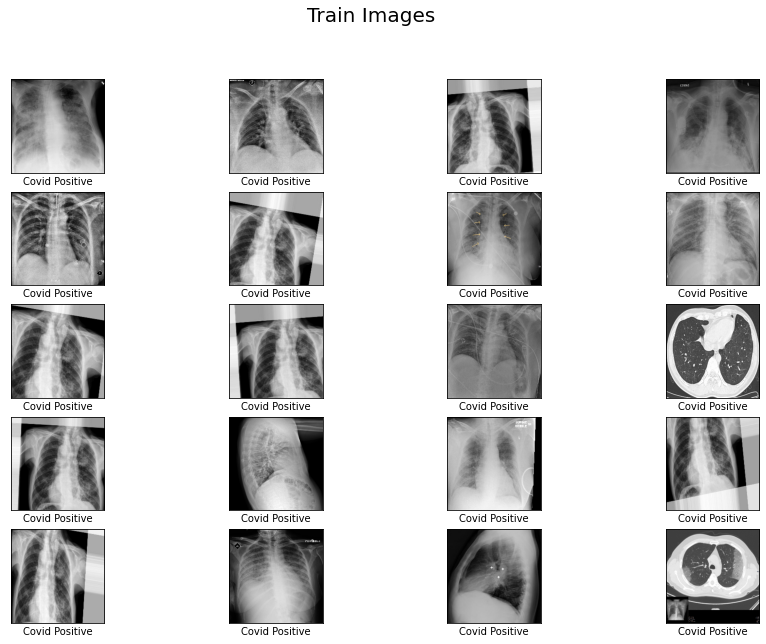

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle("Train Images", fontsize=20)
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(get_Label(train_labels[i]))
    plt.imshow(train_images[i])

###DATA AUGMENTATION I CALLBACKS

####DATA AUGMENTATION

Data augmentation slika je tehnika koja se koristi kako bi "umjetno" proširili veličinu podataka koju imamo za treniranje, na način da stvaramo modificirane verzije slika koje već postoje u skupu podataka.

Treniranje deep learning neural network modela na većem skupu podataka dovodi do bolje istreniranih, te samim time i vještijih modela. Data augmentation  tehnike mogu kreirati varijacije slika koje onda povećavaju sposobnost modela da na tim novim slikama generaliziraju ono što su naučili. 

Keras deep learning neural network biblioteka pruža mogućnost data augmentation-a preko klase ImageDataGenerator.

#####STARO

In [ ]:
batch_size = 20
#create image generator for images 
image_gen = ImageDataGenerator(
                                shear_range = 0.2,
                                  zoom_range = 0.2,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                   horizontal_flip=True, 
                                    rotation_range = 20,
                               )

In [ ]:
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator()
val_data_gen  = ImageDataGenerator()

In [ ]:
train = image_gen.flow(
      train_images,
      train_labels,
      shuffle=True, 
      batch_size=batch_size
      )
test = test_data_gen.flow(
      test_images,
      test_labels,
      shuffle=True, 
      batch_size=batch_size
      )

####CALLBACKS

Veliki problem kod treniranja neuronskih mreža je u izboru broja epoha terniranja koje će se koristiti.

Previše epoha može dovesti do overfitting-a skupa podataka, dok premalo epoha može rezultirati underfit modelom. Early stopping je metoda koja nam omogućuje da odaberemo proizvoljan veliki broj epoha, te onda ta metoda zaustavlja treniranje kada se izvedba modela prestane poboljšavati.

Keras podržava Early stopping putem callback-a pod nazivom EarlyStopping.

EarlyStopping se konfigurira kada se instancira putem argumenata. “monitor”  služi za određivanje mjere koju želimo pratiti, koja će biti okidač za kraj.U odnosu na koji smo "monitor" izabrali, gledamo koji čemo "mode" izabrati. Odnosno tu navodimo je li cilj odabrane mjere okidača povećanje (maksimiziranje ili "max") ili smanjenje (minimiziranje ili "min").

U našem slučaju pošto smo za "monitor" odabrali LOSS, za "mode" ćemo izabrati MIN, inače da smo za "monitor" odabrali ACCURACY onda bi nam "mode" bio MAX.

Ako želimo znati u kojoj epohi je došli do zaustavljanja, stavljamo "verbose" na 1. Nakon zaustavljanja, povratni poziv će ispisati broj epohe.
Često prvi znak da nema daljnjeg poboljšanja možda nije najbolje vrijeme za prestanak treniranja. To je zato što se model može spustiti u fazu bez poboljšanja ili se čak malo pogoršati prije nego što postane puno bolji. To možemo objasniti dodavanjem odgode okidaču, odnosno koji je broj epoha u kojem ne želimo vidjeti poboljšanje prije okidača. To sradimo postavljanjem argumenta "patience", u našem slučaju stavili smo broj na 10 epoha.

Još jedan callback kojeg ćemo koristiti je ReduceLROnPlateau, koji služi za smanjivanje brzine učenja kada se "monitor" prestane poboljšavati. Ovaj callback promatra količinu i ako ne vidi poboljšanje za "patience" broj epoha, onda samnjuje "learning rate" za "factor" vrijednost (new_lr = lr * factor). 

U našem slučaju "monitor" je 'loss', "patience" je 2,što znači da će se "learning rate" smanjiti čim dvije epohe budu bez poboljšanja. "factor" je 0.3 znači da će novi "learning rate" biti smanjen za new_lr = lr * factor. min_delta je 0.000001, što označava minimalnu promjenu koja se mora dogoditi kako bi se prihvatila kao poboljšanje. 

In [ ]:
early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [ early, learning_rate_reduction]

## RESNET50 FROM SCRATCH

RESNET50 je konvolucijska neuronska mreža duboka 50 slojeva. Može učitati unaprijed uvježbanu verziju mreže obučenu na više od milijun slika iz ImageNet baze podataka. Prethodno obučena mreža može klasificirati slike u 1000 kategorija objekata. Mreža je naučila bogate prikaze značajki za širok raspon slika. Ima ulaznu veličinu slike 224x224. 

### RESNET50 arhitektura

<img src='https://drive.google.com/uc?id=1CCLE1Ifs-ygkZRyUrx7Z0_n6J4hcP0C8'>



Model ResNet50 sastoji se od 5 faza, svaka sa convolutional blokom i identity blokom. Svaki convolutional blok ima 3 sloja konvolucije i svaki identity blok  također ima 3 sloja konvolucije.

Početak sadrži konvoluciju s veličinom jezgre 7x7 i 64 jezgre razlike sve s korakom veličine 2 dajući nam 1 sloj. Zatim, maksimalno združivanje s veličinom koraka 2. U sljedećoj konvoluciji postoji jezgra 1x1.64 koja slijedi jezgru 3x3.64 i na kraju jezgra 1x1.256, ova tri sloja se ponavljaju ukupno 3 puta tako da nam u ovom koraku daje 9 slojeva. Iduće imamo jezgru od 1x1.128, nakon toga jezgru od 3x3.128 i na kraju jezgru od 1x1.512, ovaj korak je ponovljen četiri puta tako da smo dobili 12 slojeva u ovom koraku. Zatim slijedi jezgra od 1x1.256 i još dvije jezgre od 3x3.256 i 1x1.1024 i to se ponavlja šest puta dajući nam ukupno 18 slojeva. Onda opet imamo 1x1.512 jezgru i još dvije 3x3.512 i 1x1.2048 i to je ponovljeno 3 puta dajući ukupno 9 slojeva. Na kraju radimo prosječni pool i završavamo ga s potpuno povezanim slojem koji sadrži 1000 čvorova i softmax funkcijom tako da nam ostaje jedan sloj.


U ResNet arhitekturi, "shortcut" ili "skip connection" omogućuje da se gradijent izravno širi natrag na ranije slojeve. U ResNet-u postoje dvije glavne vrste bloka. Koju vrstu ćemo koristiti ovisi najviše jesu li output/input istih ili različitih dimenzija. 
<br>
Identity block je standardni blok koji se koristi u ResNets-u i odgovara slučaju kada aktivacija ulaza ima istu dimenziju kao i izlazna aktivacija.

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

Convolutional Block vrstu bloka možemo koristiti kada se ulazne i izlazne dimenzije ne podudaraju. Razlika s identity blokom je u tome što u stazi prečaca postoji sloj CONV2D.


In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3))

Deep Convolutional Neural network-u potrebni su dani za treniranje, te njezino osposobljavanje zahtijeva mnogo računalnih resursa. Kako bismo to izbjegli koristimo TRANSFER LEARNINIG.

Transfer learning je tehnika u kojoj se model duboke neuronske mreže prvo trenira na problemu sličnom problemu koji se rješava. Jedan ili više slojeva  istreniranog modela se zatim koriste u novom modelu koji se onda trenira na našem problemu.


In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1')(headModel)
headModel=Dense(128, activation='relu', name='fc2')(headModel)
headModel = Dense( 2,activation='softmax', name='fc3')(headModel)

Ovdje ćemo upotrijebiti težine modela iz unaprijed treniranog modela koji su razvijeni za standardne skupove podataka za usporedbu računalnog vida kao što je ImageNet. Preuzete težine nemaju težine za gornje slojeve. Zamijenili smo zadnji sloj našim vlastitim slojem te stoga preuzete težine nemaju težine ni za te slojeve.

In [ ]:
##load trained weights 
base_model.load_weights('resnet50_weights.h5')

Kreiramo sada model koji uzima input iz posljednjeg sloja ulaznog sloja i output-e iz posljednjeg sloja iz head modela

In [ ]:
model_resnet50 = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
model_resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

####NOVO NAPRAVLJENO 15/16.3 NAKON ODGOVORA NA PROJEKT

In [ ]:
train_datag = ImageDataGenerator(rescale = 1./255)
test_datag = ImageDataGenerator(rescale = 1./255)
val_datag = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_RN50set = train_datag.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_RN50set = test_datag.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_RN50set = val_datag.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 2000 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
train_y=training_RN50set.classes
test_y=test_RN50set.classes
val_y=val_RN50set.classes

In [ ]:
training_RN50set.class_indices

{'Covid Positive': 0, 'PNEUMONIA': 1}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((2000,), (328,), (16,))

##### TRENIRANJE PRIJE FINE TUNINGA

In [ ]:
model_resnet50.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# fit the model
history = model_resnet50.fit(
  train_images,
  train_y,
  validation_data=(val_images,val_y),
  epochs=10,
  batch_size=32,shuffle=True)

Epoch 1/10
63/63 [==============================] - 66s 734ms/step - loss: 0.7337 - accuracy: 0.9325 - val_loss: 19175.7578 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 43s 686ms/step - loss: 0.4136 - accuracy: 0.9485 - val_loss: 1.0030 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 43s 686ms/step - loss: 0.0658 - accuracy: 0.9810 - val_loss: 0.6794 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 43s 686ms/step - loss: 0.0375 - accuracy: 0.9905 - val_loss: 0.6609 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 43s 686ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.7857 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 43s 685ms/step - loss: 0.0045 - accuracy: 0.9980 - val_loss: 0.6637 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 43s 686ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.8832 - val_accuracy: 0.

In [ ]:
## pomoću EVALUATE provodimo evaluaciju nsašeg modela
_, acc = model_resnet50.evaluate(test_images,test_y,batch_size=32)

##ispisujemo koliki je postotak točnosti treniranog modela na skupu za testiranje
print('Točnost na skupu za testiranje: {:.2f}%'.format(acc*100))

11/11 [==============================] - 2s 201ms/step - loss: 0.6301 - accuracy: 0.6067
Točnost na skupu za testiranje: 60.67%


#####KLASIFIKACIJA PRIJE FINE TUNINGA

In [ ]:
#predict
y_pred=model_resnet50.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
## classification report

print('Classification report')
print()
print(classification_report(y_pred,test_y, target_names=training_RN50set.class_indices))

Classification report

                precision    recall  f1-score   support

Covid Positive       0.29      0.80      0.42        59
     PNEUMONIA       0.93      0.57      0.70       269

      accuracy                           0.61       328
     macro avg       0.61      0.68      0.56       328
  weighted avg       0.81      0.61      0.65       328



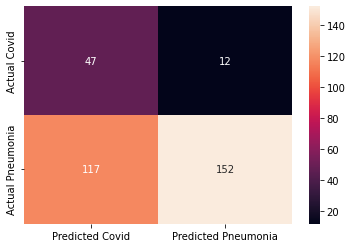

In [ ]:
## confusion metrix

##radimo matricu konfuzije kako bismo bolje dobili predodžbu točnosti predviđanja
cm = pd.DataFrame(data=confusion_matrix(y_pred,test_y),index=["Actual Covid", "Actual Pneumonia"],
columns=["Predicted Covid", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="g")

#####FINE TUNING

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
for layer in model_resnet50.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fc4bfbe5290> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fc4bf34ee50> False
<keras.layers.convolutional.Conv2D object at 0x7fc4bfbb4650> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc4bfbb4550> False
<keras.layers.core.activation.Activation object at 0x7fc4bfb1f190> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc4bfbb4b10> False
<keras.layers.convolutional.Conv2D object at 0x7fc4bfabec50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc4bfabef50> False
<keras.layers.core.activation.Activation object at 0x7fc4bfabd610> False
<keras.layers.convolutional.Conv2D object at 0x7fc4bfacae50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc4bfac9ed0> False
<keras.layers.core.activation.Activation object at 0x7fc4bfabdc10> False
<keras.layers.convolutional.Conv2D object at 0x7fc4bfadbb10> False
<keras

In [ ]:
model_resnet50.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),metrics=['accuracy'])

In [ ]:
history2 = model_resnet50.fit(
  train_images,
  train_y,
  validation_data=(val_images,val_y),
  epochs=10,
  callbacks=callbacks_list,
  batch_size=32,shuffle=True)

Epoch 1/10
63/63 [==============================] - 19s 241ms/step - loss: 0.2176 - accuracy: 0.9045 - val_loss: 0.1271 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 2/10
63/63 [==============================] - 14s 220ms/step - loss: 0.1923 - accuracy: 0.9255 - val_loss: 0.1096 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 3/10
63/63 [==============================] - 14s 221ms/step - loss: 0.1742 - accuracy: 0.9385 - val_loss: 0.0967 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 4/10
63/63 [==============================] - 14s 220ms/step - loss: 0.1616 - accuracy: 0.9445 - val_loss: 0.0857 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 5/10
63/63 [==============================] - 14s 220ms/step - loss: 0.1520 - accuracy: 0.9505 - val_loss: 0.0774 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 6/10
63/63 [==============================] - 14s 221ms/step - loss: 0.1447 - accuracy: 0.9535 - val_loss: 0.0701 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 7/10
63/63 [======================

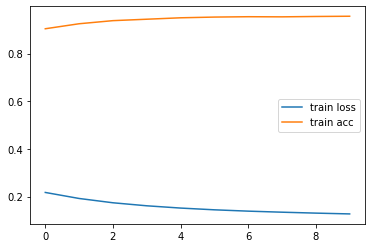

In [ ]:
# loss/acc
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['accuracy'], label='train acc')
plt.legend()
plt.show()

#####EVALUACIJA NA TEST PODACIMA NAKON FINE TUNINGA

In [ ]:
## pomoću EVALUATE provodimo evaluaciju nsašeg modela
_, acc = model_resnet50.evaluate(test_images,test_y,batch_size=32)

##ispisujemo koliki je postotak točnosti treniranog modela na skupu za testiranje
print('Točnost na skupu za testiranje: {:.2f}%'.format(acc*100))

11/11 [==============================] - 2s 203ms/step - loss: 0.1783 - accuracy: 0.9299
Točnost na skupu za testiranje: 92.99%


##### KLASIFIKACIJA NAKON FINE TUNINGA

In [ ]:
#predict
y_pred=model_resnet50.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
## classification report

print('Classification report')
print()
print(classification_report(y_pred,test_y, target_names=test_RN50set.class_indices))

Classification report

                precision    recall  f1-score   support

Covid Positive       0.91      0.95      0.93       157
     PNEUMONIA       0.95      0.91      0.93       171

      accuracy                           0.93       328
     macro avg       0.93      0.93      0.93       328
  weighted avg       0.93      0.93      0.93       328



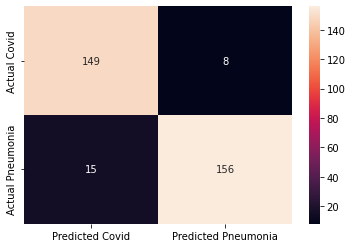

In [ ]:
## confusion metrix

##radimo matricu konfuzije kako bismo bolje dobili predodžbu točnosti predviđanja
cm = pd.DataFrame(data=confusion_matrix(y_pred,test_y),index=["Actual Covid", "Actual Pneumonia"],
columns=["Predicted Covid", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="g")

In [ ]:
#plot predction function
def plot_prediction(model_name):


  figure, axis = plt.subplots(6,5,figsize = (20,15))
  axis = axis.ravel()

  plt.suptitle("Prediction  Images", fontsize=20)



  count=0
  predicted=[]
  for i,files in enumerate(test_images) : 
    axis[i].imshow(files,cmap=plt.cm.binary)

    img = np.expand_dims(files, axis=0)
    feature = model_name.predict(img)
    prediction  = np.argmax(feature, axis=1)
    predicted.append(prediction)

    axis[i].set_xlabel("Predicted "+get_Label(int(prediction)))
    axis[i].set_ylabel("True "+get_Label(test_labels[i]))
    
    count += 1
    if count == 30 :
      break 
  figure.tight_layout(pad=3.0)

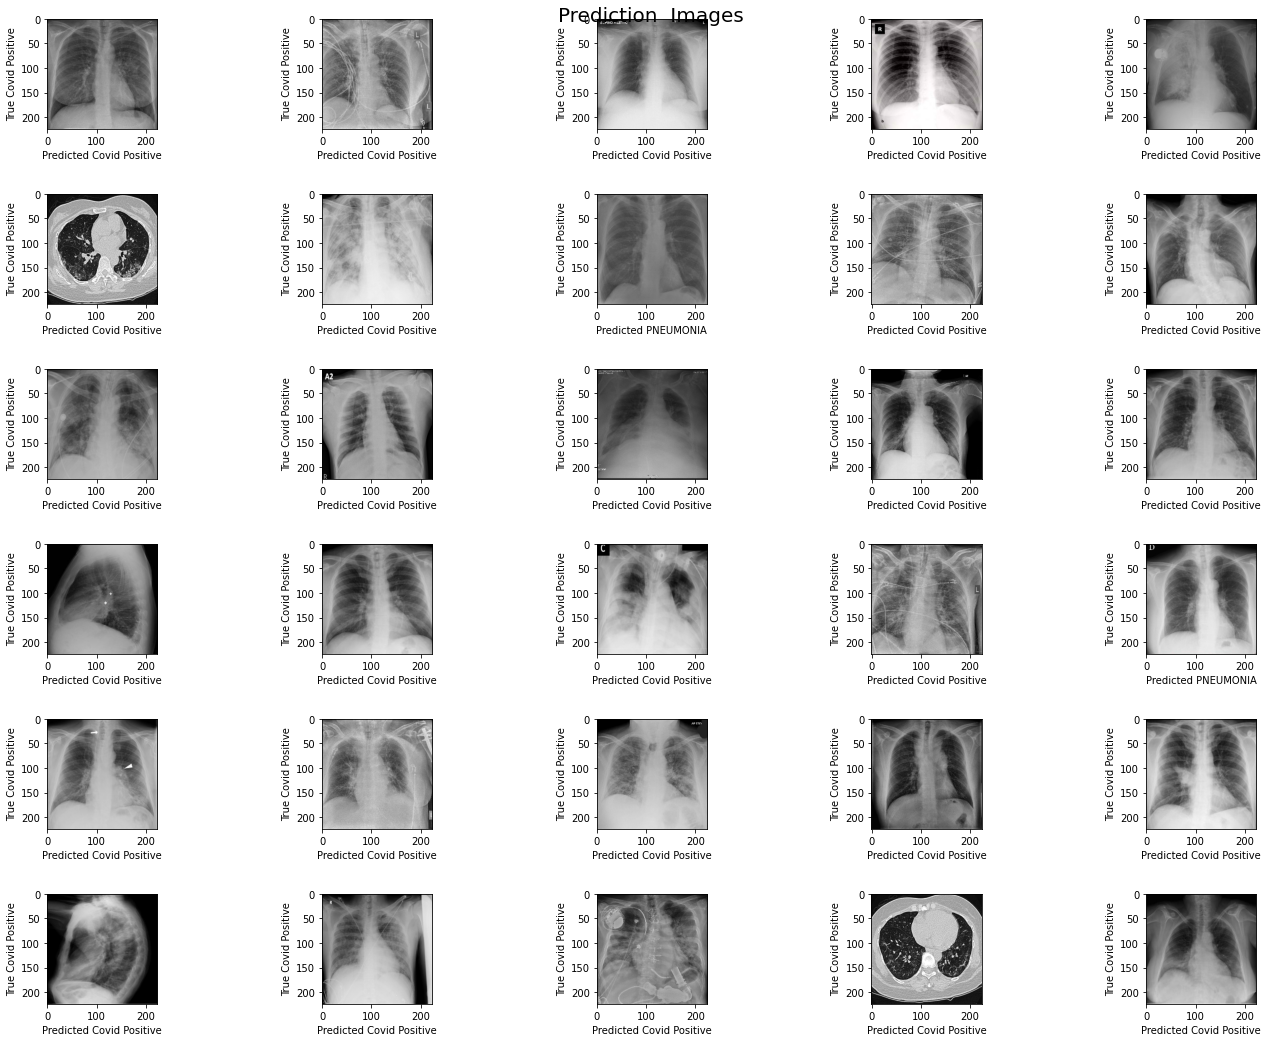

In [ ]:
plot_prediction(model_resnet50)

####STARO

##### TRENIRANJE RESNET50

In [ ]:
model_resnet50.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_resnet50 = model_resnet50.fit(train,validation_data=test,epochs=30)

Epoch 1/30
100/100 [==============================] - 76s 565ms/step - loss: 1.0267 - accuracy: 0.8520 - val_loss: 63.3889 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 55s 545ms/step - loss: 0.2749 - accuracy: 0.9315 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/30
100/100 [==============================] - 55s 545ms/step - loss: 0.1626 - accuracy: 0.9580 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
100/100 [==============================] - 55s 545ms/step - loss: 0.1189 - accuracy: 0.9610 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 5/30
100/100 [==============================] - 55s 546ms/step - loss: 0.1212 - accuracy: 0.9610 - val_loss: 0.6916 - val_accuracy: 0.5213
Epoch 6/30
100/100 [==============================] - 55s 546ms/step - loss: 0.1470 - accuracy: 0.9540 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 7/30
100/100 [==============================] - 55s 546ms/step - loss: 0.2141 - accuracy: 0.9500 - val_loss: 1.0027 - val_a

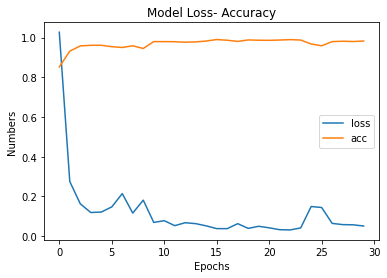

In [ ]:
plt.plot(history_resnet50.history['loss'], label='loss')
plt.plot(history_resnet50.history['accuracy'], label='acc')
plt.title('Model Loss- Accuracy')
plt.ylabel('Numbers')
plt.xlabel('Epochs')
plt.legend()

##### EVALUACIJA ResNet50 MODELA NA TEST PODACIMA

In [ ]:
_, acc = model_resnet50.evaluate(x=test)
print('Točnost na skupu za testiranje: {:.2f}%'.format(acc*100))

17/17 [==============================] - 3s 172ms/step - loss: 0.7392 - accuracy: 0.8354
Točnost na skupu za testiranje: 83.54%


klasifikacija

In [ ]:
##plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
pred = model_resnet50.predict(test)
pred_y = np.argmax(pred, axis=1)
pred_y

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

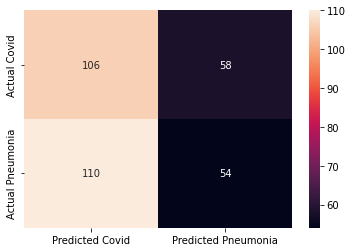

In [ ]:

cm = pd.DataFrame(data=confusion_matrix(test_labels, pred_y),index=["Actual Covid", "Actual Pneumonia"],
columns=["Predicted Covid", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="g")



In [ ]:
## classification report

print('Classification report')
print()
print(classification_report(test_labels, pred_y, target_names=labels))

Classification report

                precision    recall  f1-score   support

Covid Positive       0.49      0.65      0.56       164
     PNEUMONIA       0.48      0.33      0.39       164

      accuracy                           0.49       328
     macro avg       0.49      0.49      0.47       328
  weighted avg       0.49      0.49      0.47       328



In [ ]:
model_resnet50.save('model_resnet501')

INFO:tensorflow:Assets written to: model_resnet501/assets


In [ ]:
model_resnet50.save_weights('model_resnet501_weights.h5')

#####Fine Tuning

Želimo zadržati početne slojeve netaknutima (zamrznuti ćemo ih) i onda ćemo trenirati na ostatku slojeva koje nismo zamrznuli. To se također naziva fine-tuning mreže. Njegova prednost je u tome što ne moramo trenirati cijeli sloj od "scratch", pa stoga količina podataka potrebnih za treniranje nije velika. 

U Kerasu, svaki sloj ima parametar koji se naziva "“trainable". Za zamrzavanje težine određenog sloja, trebali bismo postaviti ovaj parametar na False, što ukazuje da ovaj sloj ne treba trenirati. Nakon toga prelazimo preko svakog sloja i odabiremo koje slojeve želimo trenirati.
U našem slučaju, zamrzavamo sav konvolucijski blok modela.



In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
for layer in model_resnet50.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f3bf62b5390> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f3bf5fc8d10> False
<keras.layers.convolutional.Conv2D object at 0x7f3bf5c973d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3bf6949550> False
<keras.layers.core.activation.Activation object at 0x7f3bf5c63e10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3bf5c29350> False
<keras.layers.convolutional.Conv2D object at 0x7f3bf5c45c50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3bf5c45ed0> False
<keras.layers.core.activation.Activation object at 0x7f3bf5c48a90> False
<keras.layers.convolutional.Conv2D object at 0x7f3bf5c51f50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3bf5bd8850> False
<keras.layers.core.activation.Activation object at 0x7f3bf60321d0> False
<keras.layers.convolutional.Conv2D object at 0x7f3bf5be5110> False
<keras

Kad smo ispisali sve slojeve možemo vidjeti da je svima "trainable" False, što znači da se tijekom treniranja ti slojevi neće mijenjati. Promjena će se dogoditi samo u zadnjim slojevima kojima je "trainable" vrijednost jednaka True.

Classification report se koristi za mjerenje kvalitete predviđanja klasifikacijskog algoritma. Koliko je predviđanja istinito, a koliko lažno. Točnije koliko je bilo, istinski pozitivnih, lažno pozitivnih, istiniti negativnih i lažno negativnih predviđanja. 
Izvješće pokazuje glavne mjere kao što su: precision, recall i f1-score, te se to pokazuje po svakoj klasi.<br>
<br>
Precision – What percent of your predictions were correct? <br>

Recall – What percent of the positive cases did you catch?  <br>

F1 score – What percent of positive predictions were correct? <br>

In [ ]:
model_resnet50.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [ ]:
history_resnet50_ft = model_resnet50.fit(train,validation_data=test,epochs=50,callbacks=callbacks_list)

Epoch 1/50
100/100 [==============================] - 38s 337ms/step - loss: 0.7799 - accuracy: 0.8145 - val_loss: 0.6363 - val_accuracy: 0.8476 - lr: 1.0000e-05
Epoch 2/50
100/100 [==============================] - 37s 368ms/step - loss: 0.6289 - accuracy: 0.8240 - val_loss: 0.5434 - val_accuracy: 0.8476 - lr: 1.0000e-05
Epoch 3/50
100/100 [==============================] - 32s 321ms/step - loss: 0.5268 - accuracy: 0.8355 - val_loss: 0.4651 - val_accuracy: 0.8506 - lr: 1.0000e-05
Epoch 4/50
100/100 [==============================] - 33s 333ms/step - loss: 0.4856 - accuracy: 0.8410 - val_loss: 0.3958 - val_accuracy: 0.8537 - lr: 1.0000e-05
Epoch 5/50
100/100 [==============================] - 36s 363ms/step - loss: 0.3961 - accuracy: 0.8605 - val_loss: 0.3370 - val_accuracy: 0.8659 - lr: 1.0000e-05
Epoch 6/50
100/100 [==============================] - 35s 349ms/step - loss: 0.3612 - accuracy: 0.8630 - val_loss: 0.2852 - val_accuracy: 0.8689 - lr: 1.0000e-05
Epoch 7/50
100/100 [========

#####EVALUACIJA NAKON FINE TUNINGA

In [ ]:
_, acc = model_resnet50.evaluate(x=test)
print('Točnost na skupu za testiranje: {:.2f}%'.format(acc*100))

17/17 [==============================] - 3s 170ms/step - loss: 0.1736 - accuracy: 0.9299
Točnost na skupu za testiranje: 92.99%


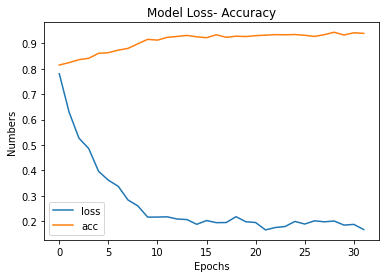

In [ ]:
plt.plot(history_resnet50_ft.history['loss'], label='loss')
plt.plot(history_resnet50_ft.history['accuracy'], label='acc')
plt.title('Model Loss- Accuracy')
plt.ylabel('Numbers')
plt.xlabel('Epochs')
plt.legend()

##### KLASIFIKACIJA NAKON FINE TUNINGA

Sada ćemo provesti predviđanje kako bismo vidjeli kako je naš RESNET50 model odradio posao. AKo bude dobro znat ćemo da smo uspješno odradili sve.

In [ ]:
pred = model_resnet50.predict(test)
pred_y = np.argmax(pred, axis=1)
pred_y


array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,

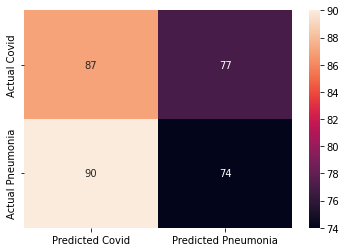

In [ ]:
cm = pd.DataFrame(data=confusion_matrix(test_labels, pred_y),index=["Actual Covid", "Actual Pneumonia"],
columns=["Predicted Covid", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="g")


In [ ]:
## classification report

print('Classification report')
print()
print(classification_report(test_labels, pred_y, target_names=labels))

Classification report

                precision    recall  f1-score   support

Covid Positive       0.49      0.53      0.51       164
     PNEUMONIA       0.49      0.45      0.47       164

      accuracy                           0.49       328
     macro avg       0.49      0.49      0.49       328
  weighted avg       0.49      0.49      0.49       328



In [ ]:
## overall performance

accuracy  = accuracy_score(pred_y, test_labels)
precision  = precision_score(pred_y, test_labels)
recall  = recall_score(pred_y, test_labels)
f1  = f1_score(pred_y, test_labels)


print()
print("Accuarcy Score----> ", accuracy)
print()
print("Precision Score---> ", precision)
print()
print("Recall Score------> ", recall)
print()
print("F1 Score----------> ", f1)
print()

print()


Accuarcy Score---->  0.5

Precision Score--->  1.0

Recall Score------>  0.5

F1 Score---------->  0.6666666666666666




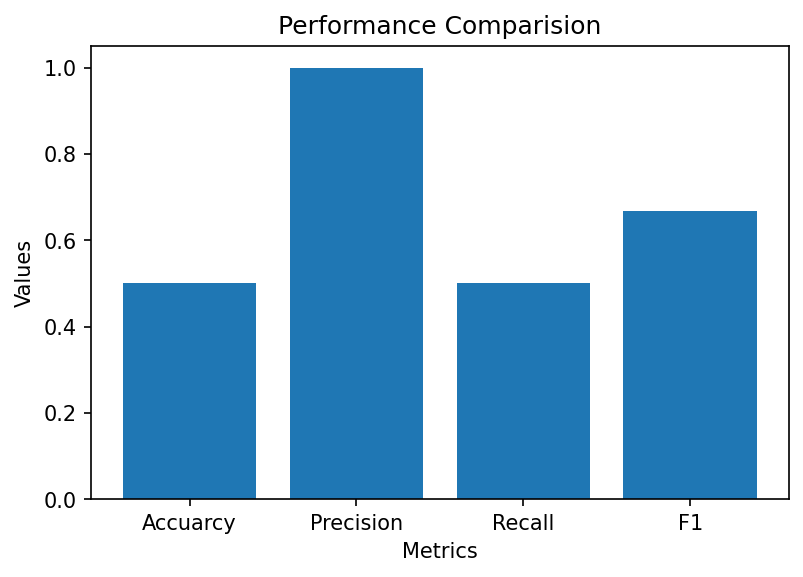

In [ ]:
## BAR plot

value = [accuracy, precision, recall, f1]
imena = ['Accuarcy', 'Precision', 'Recall', 'F1']

plt.figure(figsize = (6, 4), dpi=150)
plt.bar(imena, value)
plt.title('Performance Comparision')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

In [ ]:
#plot predction function
def plot_prediction(model_name):


  figure, axis = plt.subplots(6,5,figsize = (20,15))
  axis = axis.ravel()

  plt.suptitle("Prediction  Images", fontsize=20)



  count=0
  predicted=[]
  for i,files in enumerate(test_images) : 
    axis[i].imshow(files,cmap=plt.cm.binary)

    img = np.expand_dims(files, axis=0)
    feature = model_name.predict(img)
    prediction  = np.argmax(feature, axis=1)
    predicted.append(prediction)

    axis[i].set_xlabel("Predicted "+get_Label(int(prediction)))
    axis[i].set_ylabel("True "+get_Label(test_labels[i]))
    
    count += 1
    if count == 30 :
      break 
  figure.tight_layout(pad=3.0)

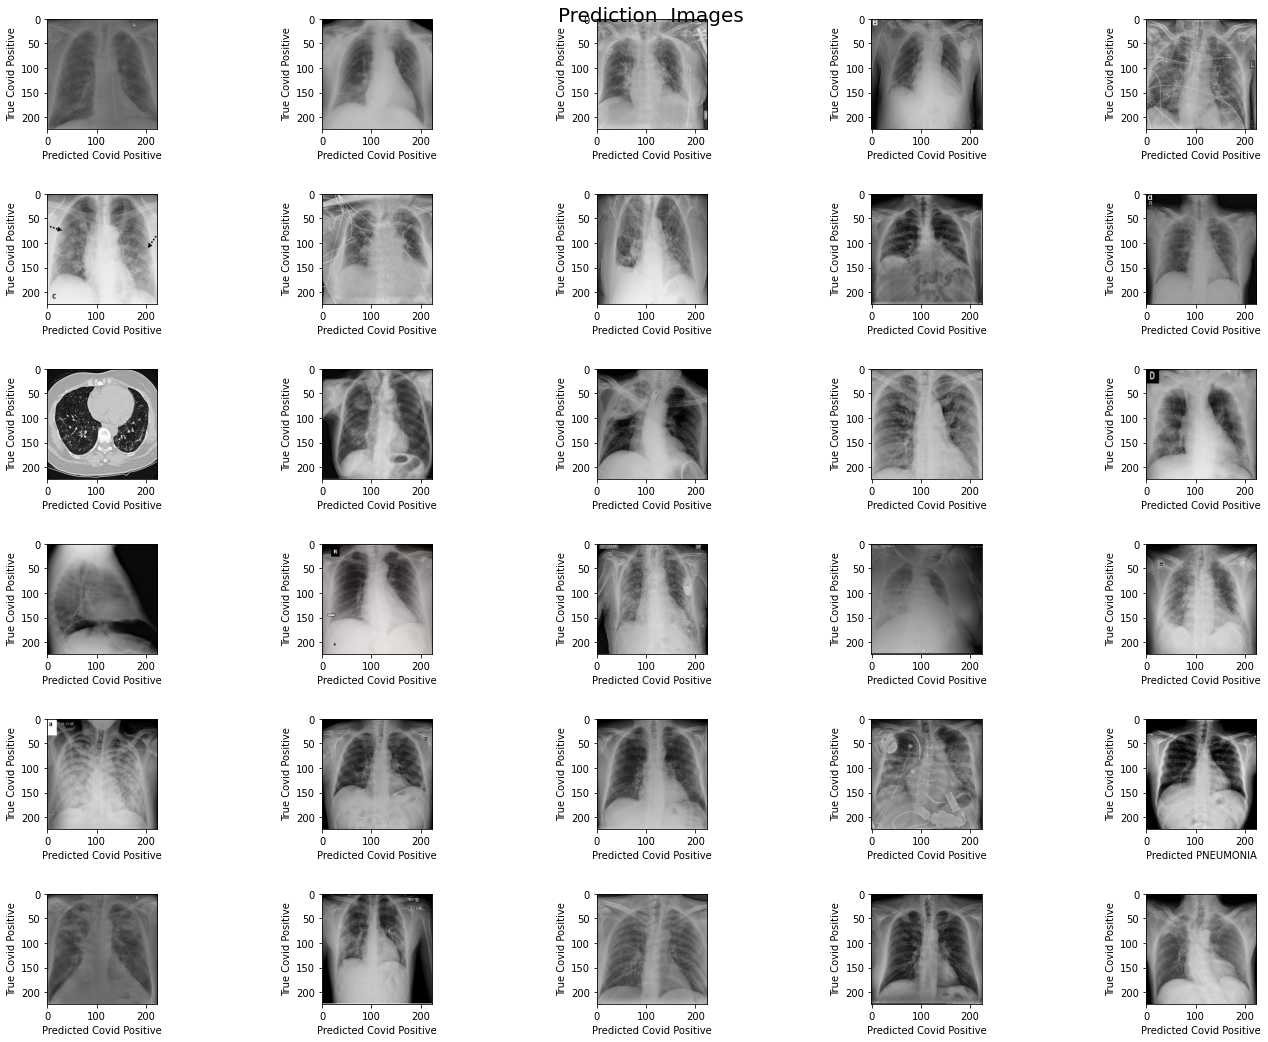

In [ ]:
plot_prediction(model_resnet50)

In [ ]:
model_resnet50.save_weights('model_resnet502_weights.h5')

In [ ]:
model_resnet50.save('model_resnet501')

INFO:tensorflow:Assets written to: model_resnet501/assets


## VGG19 FROM SCRATCH

VGG je klasična konvolucijska arhitektura neuronske mreže. Temeljila se na analizi kako povećati dubinu takvih mreža. Mreža koristi male 3 x 3 filtere. Inače, mreža je karakterizirana svojom jednostavnošću: jedine ostale komponente su pooling layers i fully connected layer.



###VGG19 ARHITEKTURA

<img src='https://drive.google.com/uc?id=1VI473SndIpYN20D1hsVt5aaHVMfRZq2A'>


Ulaz u bilo koju od mrežnih konfiguracija smatra se slikom fiksne veličine 224x224 s tri kanala – R, G i B. Jedina prethodna obrada je normalizacija RGB vrijednosti za svaki piksel. To se postiže oduzimanjem srednje vrijednosti od svakog piksela.
Slika prolazi kroz prvi stog od 2 konvolucijska sloja vrlo male receptivne veličine 3x3, nakon čega slijede ReLu aktivacije. Svaki od ova 2 sloja sadrži 64 filtera. Korak konvolucije je fiksiran na 1 piksel, a padding je 1 piksel. Ova konfiguracija čuva prostornu razlučivost, a veličina izlazne aktivacijske karte jednaka je dimenzijama ulazne slike. Aktivacijske karte zatim prolaze kroz prostorno maksimalno udruživanje kroz prozor od 2x2 piksela, s korakom od 2 piksela. Time se prepolovi veličina aktivacije. Tako je veličina aktivacije na kraju prvog snopa 122x122x64.
Aktivacije zatim teku kroz sličan drugi stog, ali sa 128 filtera u odnosu na 64 u prvom. Posljedično, veličina poslije toga postaje 56x56x128. Nakon toga slijedi treći snop sa 4 konvolucijska sloja i najvećim slojem bazena. Ovdje je broj primijenjenih filtara 256, što čini izlaznu veličinu hrpe 28x28x258. Nakon toga slijede 2 snopa s 4 konvolucijska sloja, od kojih svaki sadrži 512 filtara. Izlaz na kraju oba snopa bit će 7x7x512.
Niz konvolucijskih slojeva slijede tri potpuno povezana sloja sa izravnavajućim slojem između. Prva dva imaju po 4096 neurona, a posljednji potpuno povezani sloj služi kao izlazni sloj i ima 1000 neurona koji odgovaraju 1000 mogućih klasa za ImageNet skup podataka. Izlazni sloj slijedi Softmax aktivacijski sloj koji se koristi za kategoričku klasifikaciju.


Sada ćemo prvo definirati model i njegove slojeve.

In [ ]:
def VGG19_model():
    model = Sequential()

    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg19'))

    return model

In [ ]:
base_model_vgg19=VGG19_model()

Finalnom modelu dodajemo njegovu bazu, te zadnje slojeve koji su nam potrebni za upotpuniti model kako bismo ga dalje mogli trenirati i vršiti predviđanja.

In [ ]:
model_VGG19 = Sequential([
     base_model_vgg19,
     Flatten(name='flatten'),
     Dense(256, activation='relu', name='fc1'),
     Dense(128, activation='relu', name='fc2'),
     Dropout(0.5),
     Dense(2, activation='softmax', name='output')])

Ovdje ćemo upotrijebiti težine modela iz unaprijed treniranog modela koji su razvijeni za standardne skupove podataka za usporedbu računalnog vida kao što je ImageNet. Preuzete težine nemaju težine za gornje slojeve. Zamijenili smo zadnji sloj našim vlastitim slojem te stoga preuzete težine nemaju težine ni za te slojeve.

In [ ]:
base_model_vgg19.load_weights('vgg19_weights.h5')

Ispisujemo sažetak trenutnog izgleda modela

In [ ]:
model_VGG19.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 256)               6422784   
                                                                 
 fc2 (Dense)                 (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 output (Dense)              (None, 2)                 258       
                                                                 
Total params: 26,480,322
Trainable params: 26,480,322


###RADENO PONOVO 15-16.3. nakon odgovora na projekt

####PRIPREMA PODATAKA ZA VGG19

U ovom dijelu pripremamo podatke koji će nam služiti za treniranje i testiranje modela. Odlučili smo ih pripremiti ponovo i na ovaj način jer smo tako dobili najbolje performanse modela. 

In [ ]:
## dvije skupine slika imamo ---> COVID POZITIVNE I UPALU PLUCA 
labels = ['Covid Positive','PNEUMONIA']

##imamo tri glavna foldera --> train | test | val
folders=['train','test','val']


In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path)[:1000]:

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path)[:164]:

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path)[:30]:

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

####TRENIRANJE VGG19 MODELA

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 2000 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices

{'Covid Positive': 0, 'PNEUMONIA': 1}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((2000,), (328,), (16,))

In [ ]:
model_VGG19.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
# fit the model
history = model_VGG19.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=callbacks_list,
  batch_size=32,shuffle=True)

Epoch 1/10
63/63 [==============================] - 86s 1s/step - loss: 0.9889 - accuracy: 0.5045 - val_loss: 0.6929 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
63/63 [==============================] - 61s 965ms/step - loss: 0.6972 - accuracy: 0.4995 - val_loss: 0.6912 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
63/63 [==============================] - 61s 967ms/step - loss: 0.6995 - accuracy: 0.5845 - val_loss: 0.6465 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 4/10
63/63 [==============================] - ETA: 0s - loss: 0.7131 - accuracy: 0.5620
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
63/63 [==============================] - 61s 967ms/step - loss: 0.7131 - accuracy: 0.5620 - val_loss: 0.6735 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
63/63 [==============================] - 61s 969ms/step - loss: 0.4644 - accuracy: 0.8135 - val_loss: 0.3635 - val_accuracy: 0.9375 - lr: 3.0000e-04
Epoch 6/10
63/63 [==============================] - 61s 970m

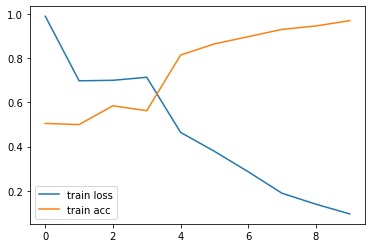

In [ ]:
# loss/acc
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.show()

#### EVALUACIJA NA TEST PODACIMA

In [ ]:
## pomoću EVALUATE provodimo evaluaciju nsašeg modela
_, acc = model_VGG19.evaluate(test_x,test_y,batch_size=32)

##ispisujemo koliki je postotak točnosti treniranog modela na skupu za testiranje
print('Točnost na skupu za testiranje: {:.2f}%'.format(acc*100))

11/11 [==============================] - 5s 465ms/step - loss: 0.0894 - accuracy: 0.9634
Točnost na skupu za testiranje: 96.34%


####KLASIFIKACIJA PRIJE FINE TUNINGA

In [ ]:
#predict
y_pred=model_VGG19.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
## classification report

print('Classification report')
print()
print(classification_report(y_pred,test_y, target_names=training_set.class_indices))

Classification report

                precision    recall  f1-score   support

Covid Positive       0.96      0.97      0.96       162
     PNEUMONIA       0.97      0.96      0.96       166

      accuracy                           0.96       328
     macro avg       0.96      0.96      0.96       328
  weighted avg       0.96      0.96      0.96       328



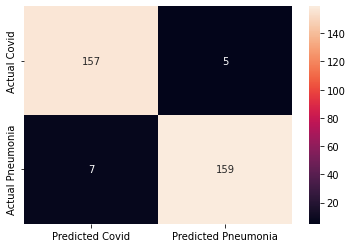

In [ ]:
## confusion metrix

##radimo matricu konfuzije kako bismo bolje dobili predodžbu točnosti predviđanja
cm = pd.DataFrame(data=confusion_matrix(y_pred,test_y),index=["Actual Covid", "Actual Pneumonia"],
columns=["Predicted Covid", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="g")

####FINE TUNING

In [ ]:
for layer in base_model_vgg19.layers:
    layer.trainable = False

In [ ]:
for layer in model_VGG19.layers:
    print(layer, layer.trainable)

<keras.engine.sequential.Sequential object at 0x7f4d342ffb10> True
<keras.layers.core.flatten.Flatten object at 0x7f4d30047950> True
<keras.layers.core.dense.Dense object at 0x7f4d34361890> True
<keras.layers.core.dense.Dense object at 0x7f4d300b4c90> True
<keras.layers.core.dense.Dense object at 0x7f4d30044b50> True


In [ ]:
model_VGG19.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),metrics=['accuracy'])

In [ ]:
history2 = model_VGG19.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=callbacks_list,
  batch_size=32,shuffle=True)

Epoch 1/10
63/63 [==============================] - 23s 353ms/step - loss: 0.0770 - accuracy: 0.9780 - val_loss: 0.0247 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 2/10
63/63 [==============================] - 22s 347ms/step - loss: 0.0738 - accuracy: 0.9745 - val_loss: 0.0232 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 3/10
63/63 [==============================] - 22s 342ms/step - loss: 0.0798 - accuracy: 0.9715 - val_loss: 0.0224 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 4/10
63/63 [==============================] - 21s 341ms/step - loss: 0.0724 - accuracy: 0.9760 - val_loss: 0.0216 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 5/10
63/63 [==============================] - 21s 340ms/step - loss: 0.0689 - accuracy: 0.9765 - val_loss: 0.0204 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 6/10
63/63 [==============================] - 21s 339ms/step - loss: 0.0700 - accuracy: 0.9785 - val_loss: 0.0204 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 7/10
63/63 [======================

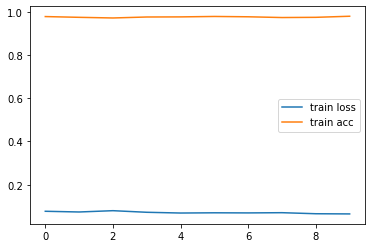

In [ ]:
# loss/acc
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['accuracy'], label='train acc')
plt.legend()
plt.show()

####EVALUACIJA NA TEST PODACIMA NAKON FINE TUNINGA

In [ ]:
## pomoću EVALUATE provodimo evaluaciju nsašeg modela
_, acc = model_VGG19.evaluate(test_x,test_y,batch_size=32)

##ispisujemo koliki je postotak točnosti treniranog modela na skupu za testiranje
print('Točnost na skupu za testiranje: {:.2f}%'.format(acc*100))

11/11 [==============================] - 4s 327ms/step - loss: 0.0819 - accuracy: 0.9634
Točnost na skupu za testiranje: 96.34%


#### KLASIFIKACIJA NAKON FINE TUNINGA

In [ ]:
#predict
y_pred=model_VGG19.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
## classification report

print('Classification report')
print()
print(classification_report(y_pred,test_y, target_names=training_set.class_indices))

Classification report

                precision    recall  f1-score   support

Covid Positive       0.96      0.97      0.96       162
     PNEUMONIA       0.97      0.96      0.96       166

      accuracy                           0.96       328
     macro avg       0.96      0.96      0.96       328
  weighted avg       0.96      0.96      0.96       328



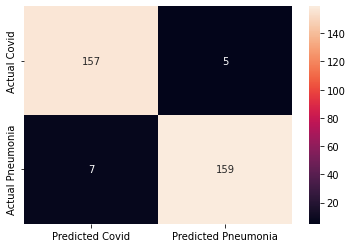

In [ ]:
## confusion metrix

##radimo matricu konfuzije kako bismo bolje dobili predodžbu točnosti predviđanja
cm = pd.DataFrame(data=confusion_matrix(y_pred,test_y),index=["Actual Covid", "Actual Pneumonia"],
columns=["Predicted Covid", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="g")

In [ ]:
#plot predction function
def plot_prediction2(model_name):


  figure, axis = plt.subplots(6,5,figsize = (20,15))
  axis = axis.ravel()

  plt.suptitle("Prediction  Images", fontsize=20)



  count=0
  predicted=[]
  for i,files in enumerate(test_x) : 
    axis[i].imshow(files,cmap=plt.cm.binary)

    img = np.expand_dims(files, axis=0)
    feature = model_name.predict(img)
    prediction  = np.argmax(feature, axis=1)
    predicted.append(prediction)

    axis[i].set_xlabel("Predicted "+get_Label(int(prediction)))
    axis[i].set_ylabel("True "+get_Label(test_labels[i]))
    
    count += 1
    if count == 30 :
      break 
  figure.tight_layout(pad=3.0)

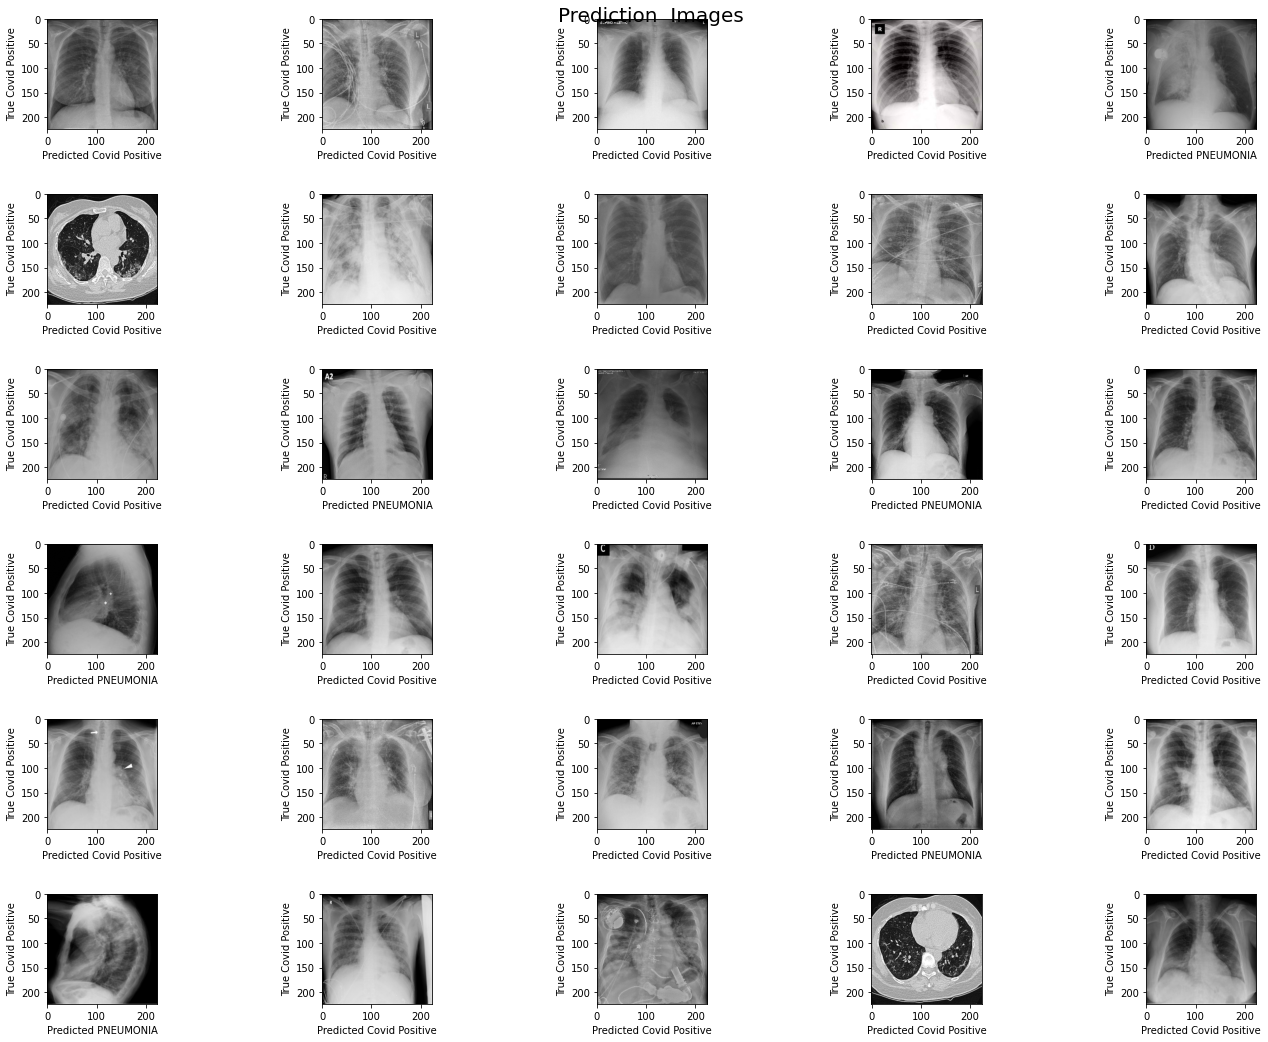

In [ ]:
plot_prediction2(model_VGG19)

###VERZIJA STARA

U ovom dijelu pripremamo podatke koji će nam služiti za treniranje i testiranje modela. Odlučili smo ih pripremiti ponovo i na ovaj način jer smo tako dobili najbolje performanse modela. 

In [ ]:
# Radimo strukturu foldera, potrebna su nam 3: TRAINING | TESTING | VALIDATING
for dir in ['Training', 'Validation', 'Testing']:
  os.mkdir(dir)
  os.mkdir('./{}/covid'.format(dir))
  os.mkdir('./{}/pneumonia'.format(dir))

In [ ]:
## Odvajamo skup slika x-ray covida-19 koji će nam služiti za treniranje 

src_dir ='./chest_xray/train/Covid Positive'

##putanja gdje ih želimo kopirati
dst_dir = './Training/covid'

##imena slika
file_names = glob(os.path.join(src_dir, "*.*"))

##petlja koja izvršava kopiranje slika iz jednog direktorija u drugi
for ifile in file_names[:1000]:
    shutil.copy(ifile, dst_dir)

In [ ]:
### Ispisujemo koliko imamo podataka
print('Total training covid:',  len(os.listdir(dst_dir)))

Total training covid: 1000


In [ ]:
## Odvajamo skup slika x-ray upale pluća koji će nam služiti za treniranje 

##putanja gdje se nalaze slike
src_dir ='./chest_xray/train/PNEUMONIA'

##putanja gdje ih želimo kopirati
dst_dir = './Training/pneumonia'

##imena slika
file_names = glob(os.path.join(src_dir, "*.*"))

##petlja koja izvršava kopiranje slika iz jednog direktorija u drugi
for ifile in file_names[:1000]:
    shutil.copy(ifile, dst_dir)

### Ispisujemo koliko imamo podataka
print('Total training pneumonia:',  len(os.listdir(dst_dir)))

Total training pneumonia: 1000


In [ ]:
## Odvajamo skup slika x-ray covida-19 koji će nam služiti za testiranje 
src_dir ='./chest_xray/test/Covid Positive'

##putanja gdje ih želimo kopirati
dst_dir = './Testing/covid'

##imena slika
file_names = glob(os.path.join(src_dir, "*.*"))

##petlja koja izvršava kopiranje slika iz jednog direktorija u drugi
for ifile in file_names[:164]:
    shutil.copy(ifile, dst_dir)

### Ispisujemo koliko imamo podataka
print('Total testing covid:',  len(os.listdir(dst_dir)))

Total testing covid: 164


In [ ]:
## Odvajamo skup slika x-ray upale pluća koji će nam služiti za testiranje 

##putanja gdje se nalaze slike
src_dir ='./chest_xray/test/PNEUMONIA'

##putanja gdje ih želimo kopirati
dst_dir = './Testing/pneumonia'

##imena slika
file_names = glob(os.path.join(src_dir, "*.*"))

##petlja koja izvršava kopiranje slika iz jednog direktorija u drugi
for ifile in file_names[:164]:
    shutil.copy(ifile, dst_dir)

### Ispisujemo koliko imamo podataka
print('Total testing pneumonia:',  len(os.listdir(dst_dir)))

Total testing pneumonia: 164


In [ ]:
## Odvajamo skup slika x-ray upale pluća koji će nam služiti za validaciju 

##putanja gdje se nalaze slike
src_dir ='./chest_xray/train/PNEUMONIA'

##putanja gdje ih želimo kopirati
dst_dir = './Validation/pneumonia'

##imena slika
file_names = glob(os.path.join(src_dir, "*.*"))

##petlja koja izvršava kopiranje slika iz jednog direktorija u drugi
for ifile in file_names[:30]:
    shutil.copy(ifile, dst_dir)

### Ispisujemo koliko imamo podataka
print('Total validation pneumonia:',  len(os.listdir(dst_dir)))

Total validation pneumonia: 30


In [ ]:
## Odvajamo skup slika x-ray covida-19 koji će nam služiti za validaciju 

##putanja gdje se nalaze slike
src_dir ='./chest_xray/train/Covid Positive'

##putanja gdje ih želimo kopirati
dst_dir = './Validation/covid'

##imena slika
file_names = glob(os.path.join(src_dir, "*.*"))

##petlja koja izvršava kopiranje slika iz jednog direktorija u drugi
for ifile in file_names[:30]:
    shutil.copy(ifile, dst_dir)

### Ispisujemo koliko imamo podataka
print('Total validation covid:',  len(os.listdir(dst_dir)))

Total validation covid: 30


#### TRENIRANJE VGG19

Ulazne vrijednosti tijekom treniranja imaju fiksnu veličinu 224x224 RBG. Pošto koristimo težine koje su trenirane na jednim podacimo, želimo onda naše podatke klasificirati na isti način.


In [ ]:
gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

Dohvaćamo podatke iz direktorija i onda na njima provodimo procesiranje input-a i oblikujemo ih po potrebi.

In [ ]:
train_flow = gen.flow_from_directory('./Training', target_size=(in_shape[0], in_shape[1]),
                                          batch_size = 20, class_mode = 'categorical')
validation_flow = gen.flow_from_directory('./Validation', target_size=(in_shape[0], in_shape[1]),
                                                batch_size=20, class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
model_VGG19.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Sada krećemo u treniranje modela.

history_VGG19 = model_VGG19.fit(x=train,images, train_labels
                    steps_per_epoch=len(train_flow), 
                    epochs=20, 
                    validation_data=(val_images,,val_labels), 
                    validation_steps=len(validation_flow))

In [ ]:
history_VGG19 = model_VGG19.fit(x=train_flow, 
                    steps_per_epoch=len(train_flow), 
                    epochs=10, 
                    validation_data=validation_flow, 
                    validation_steps=len(validation_flow))

Epoch 1/10
100/100 [==============================] - 58s 422ms/step - loss: 12.9755 - accuracy: 0.7340 - val_loss: 0.4521 - val_accuracy: 0.8333
Epoch 2/10
100/100 [==============================] - 42s 416ms/step - loss: 0.1955 - accuracy: 0.9300 - val_loss: 0.1770 - val_accuracy: 0.9167
Epoch 3/10
100/100 [==============================] - 42s 423ms/step - loss: 0.1390 - accuracy: 0.9495 - val_loss: 0.0989 - val_accuracy: 0.9500
Epoch 4/10
100/100 [==============================] - 43s 422ms/step - loss: 0.1041 - accuracy: 0.9640 - val_loss: 0.1532 - val_accuracy: 0.9167
Epoch 5/10
100/100 [==============================] - 42s 418ms/step - loss: 0.1170 - accuracy: 0.9580 - val_loss: 0.1385 - val_accuracy: 0.9500
Epoch 6/10
100/100 [==============================] - 42s 422ms/step - loss: 0.0790 - accuracy: 0.9725 - val_loss: 0.0959 - val_accuracy: 0.9833
Epoch 7/10
100/100 [==============================] - 42s 424ms/step - loss: 0.0653 - accuracy: 0.9805 - val_loss: 0.0490 - val_a

#### EVALUACIJA VGG19 MODELA NA TEST PODACIMA

Kada smo završili s treniranjem modela potrebno ga je evaluirati na testnim podacima

In [ ]:
test_flow = gen.flow_from_directory('./Testing', target_size=(in_shape[0], in_shape[1]),
                                          batch_size = 20, class_mode = 'categorical')

Found 328 images belonging to 2 classes.


In [ ]:
## pomoću EVALUATE provodimo evaluaciju nsašeg modela
_, acc = model_VGG19.evaluate(x=test_flow)

##ispisujemo koliki je postotak točnosti treniranog modela na skupu za testiranje
print('Točnost na skupu za testiranje: {:.2f}%'.format(acc*100))

17/17 [==============================] - 6s 364ms/step - loss: 0.1200 - accuracy: 0.9482
Točnost na skupu za testiranje: 94.82%


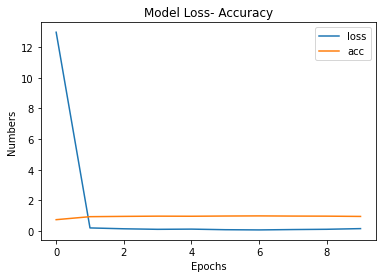

In [ ]:
##Grafički prikazujemo vrijednosti LOSS i ACCURACY našeg modela
plt.plot(history_VGG19.history['loss'], label='loss')
plt.plot(history_VGG19.history['accuracy'], label='acc')
plt.title('Model Loss- Accuracy')
plt.ylabel('Numbers')
plt.xlabel('Epochs')
plt.legend()

####KLASIFIKACIJA MODELA PRIJE FINE TUNINGA

Prije nego što odradimo fine tuning želimo vidjeti performanse modela trenutno.

In [ ]:
pred = model_VGG19.predict(test_flow)
pred_y = np.argmax(pred, axis=1)
pred_y

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

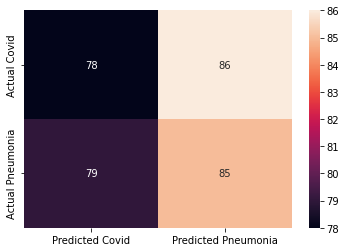

In [ ]:
##radimo matricu konfuzije kako bismo bolje dobili predodžbu točnosti predviđanja
cm = pd.DataFrame(data=confusion_matrix(test_labels, pred_y),index=["Actual Covid", "Actual Pneumonia"],
columns=["Predicted Covid", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="g")

In [ ]:
##Keras ima savršen evaluator performansi modela koji nam pokazuje stanje vrijednosti f1 score, recall, precision...
print('Classification report')
print()
print(classification_report(test_labels, pred_y, target_names=labels))

Classification report

                precision    recall  f1-score   support

Covid Positive       0.50      0.48      0.49       164
     PNEUMONIA       0.50      0.52      0.51       164

      accuracy                           0.50       328
     macro avg       0.50      0.50      0.50       328
  weighted avg       0.50      0.50      0.50       328



In [ ]:
#Grafički prikazujemo malo predviđene vrijednosti
def plot_prediction(model_name):


  figure, axis = plt.subplots(6,5,figsize = (20,15))
  axis = axis.ravel()

  plt.suptitle("Prediction  Images", fontsize=20)



  count=0
  predicted=[]
  for i,files in enumerate(test_images) : 
    axis[i].imshow(files,cmap=plt.cm.binary)

    img = np.expand_dims(files, axis=0)
    feature = model_name.predict(img)
    prediction  = np.argmax(feature, axis=1)
    predicted.append(prediction)

    axis[i].set_xlabel("Predicted "+get_Label(int(prediction)))
    axis[i].set_ylabel("True "+get_Label(test_labels[i]))
    
    count += 1
    if count == 30 :
      break 
  figure.tight_layout(pad=3.0)

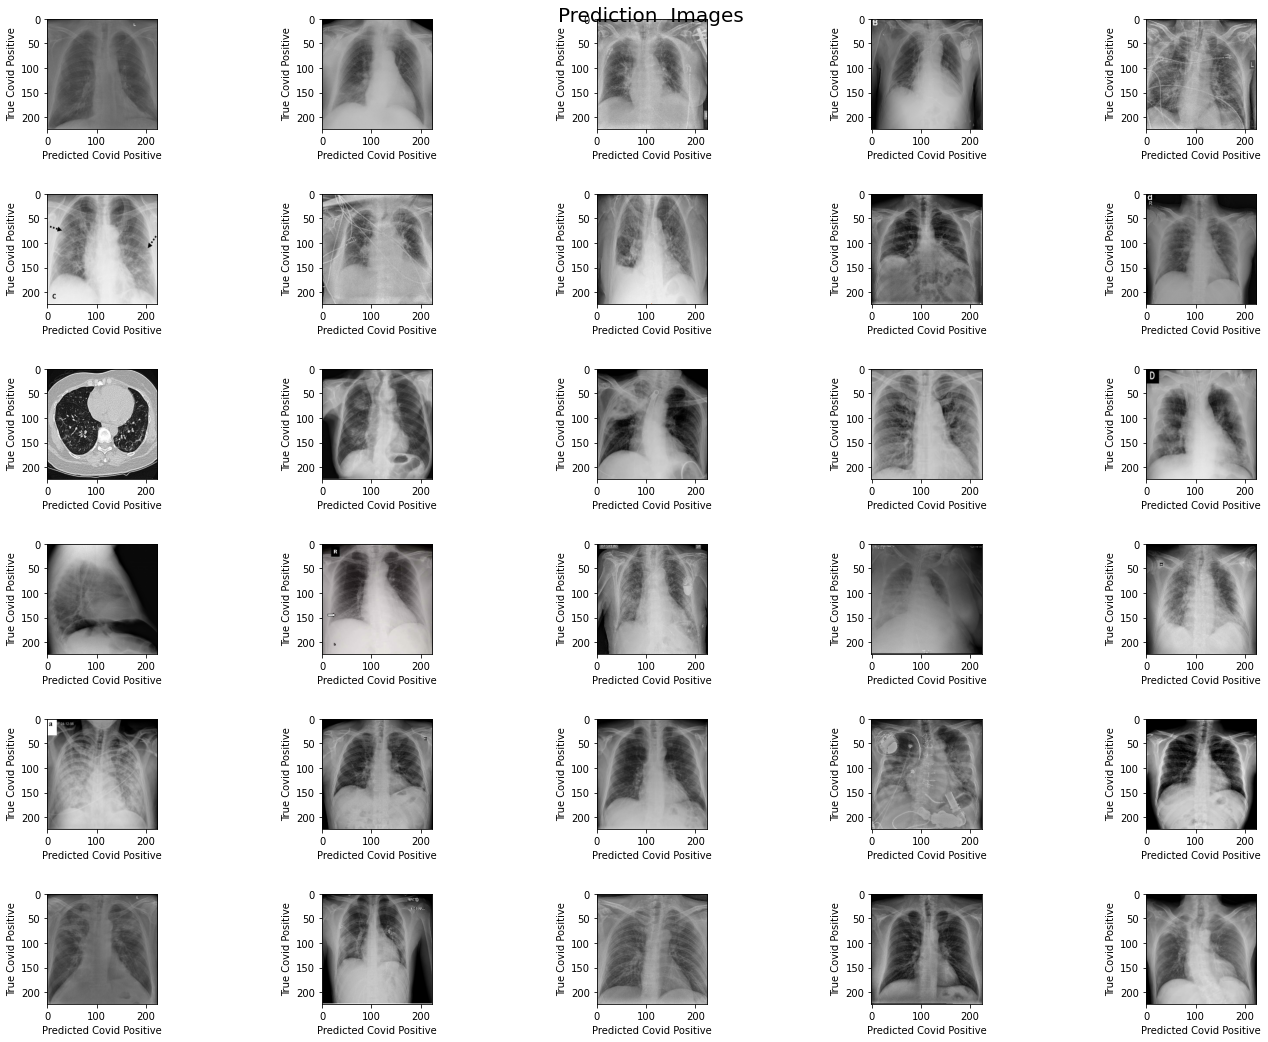

In [ ]:
plot_prediction(model_VGG19)

In [ ]:
model_VGG19.save('model_VGG191')

INFO:tensorflow:Assets written to: model_VGG191/assets


In [ ]:
model_VGG19.save_weights('model_VGG191_weights.h5')

####FINE TUNING

Želimo zadržati početne slojeve netaknutima (zamrznuti ćemo ih) i onda ćemo trenirati na ostatku slojeva koje nismo zamrznuli. To se također naziva fine-tuning mreže. Njegova prednost je u tome što ne moramo trenirati cijeli sloj od "scratch", pa stoga količina podataka potrebnih za treniranje nije velika. 

U Kerasu, svaki sloj ima parametar koji se naziva "“trainable". Za zamrzavanje težine određenog sloja, trebali bismo postaviti ovaj parametar na False, što ukazuje da ovaj sloj ne treba trenirati. Nakon toga prelazimo preko svakog sloja i odabiremo koje slojeve želimo trenirati.
U našem slučaju, zamrzavamo sav konvolucijski blok modela.


In [ ]:
for layer in base_model_vgg19.layers:
    layer.trainable = False

In [ ]:
for layer in model_VGG19.layers:
    print(layer, layer.trainable)

<keras.engine.sequential.Sequential object at 0x7ff3a6e92e10> True
<keras.layers.core.flatten.Flatten object at 0x7ff3a041bf90> True
<keras.layers.core.dense.Dense object at 0x7ff3a0476450> True
<keras.layers.core.dense.Dense object at 0x7ff3a040fd90> True
<keras.layers.core.dropout.Dropout object at 0x7ff3a0416390> True
<keras.layers.core.dense.Dense object at 0x7ff3a0416350> True



Kad smo ispisali sve slojeve možemo vidjeti da je svima "trainable" False, što znači da se tijekom treniranja ti slojevi neće mijenjati. Promjena će se dogoditi samo u zadnjim slojevima kojima je "trainable" vrijednost jednaka True.

In [ ]:
model_VGG19.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [ ]:
history_VGG19 = model_VGG19.fit(x=train_flow, 
                    steps_per_epoch=len(train_flow), 
                    epochs=50, 
                    validation_data=validation_flow, 
                    validation_steps=len(validation_flow),callbacks=callbacks_list)

Epoch 1/50
100/100 [==============================] - 33s 322ms/step - loss: 0.0615 - accuracy: 0.9765 - val_loss: 0.1130 - val_accuracy: 0.9500 - lr: 1.0000e-05
Epoch 2/50
100/100 [==============================] - 31s 313ms/step - loss: 0.0580 - accuracy: 0.9790 - val_loss: 0.1081 - val_accuracy: 0.9500 - lr: 1.0000e-05
Epoch 3/50
100/100 [==============================] - 31s 313ms/step - loss: 0.0550 - accuracy: 0.9815 - val_loss: 0.1033 - val_accuracy: 0.9833 - lr: 1.0000e-05
Epoch 4/50
100/100 [==============================] - 32s 316ms/step - loss: 0.0526 - accuracy: 0.9825 - val_loss: 0.0992 - val_accuracy: 0.9833 - lr: 1.0000e-05
Epoch 5/50
100/100 [==============================] - 32s 315ms/step - loss: 0.0505 - accuracy: 0.9830 - val_loss: 0.0964 - val_accuracy: 0.9833 - lr: 1.0000e-05
Epoch 6/50
100/100 [==============================] - 31s 313ms/step - loss: 0.0487 - accuracy: 0.9840 - val_loss: 0.0931 - val_accuracy: 0.9833 - lr: 1.0000e-05
Epoch 7/50
100/100 [========

####EVALUACIJA MODELA NAKON FINE TUNINGA

In [ ]:
_, acc = model_VGG19.evaluate(x=test_flow)
print('Točnost na skupu za testiranje: {:.2f}%'.format(acc*100))

17/17 [==============================] - 5s 297ms/step - loss: 0.0858 - accuracy: 0.9756
Točnost na skupu za testiranje: 97.56%


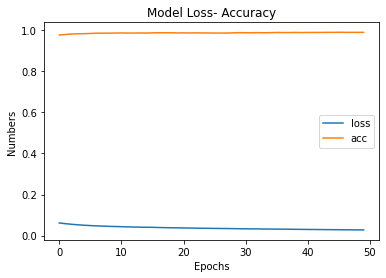

In [ ]:
plt.plot(history_VGG19.history['loss'], label='loss')
plt.plot(history_VGG19.history['accuracy'], label='acc')
plt.title('Model Loss- Accuracy')
plt.ylabel('Numbers')
plt.xlabel('Epochs')
plt.legend()

####KLASIFIKACIJA MODELA NAKON FINE TUNINGA

In [ ]:
pred = model_VGG19.predict(test_flow)
pred_y = np.argmax(pred, axis=1)
pred_y

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,

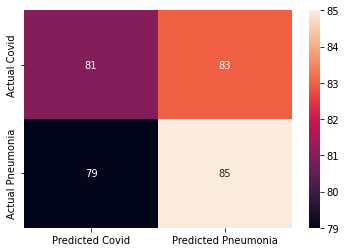

In [ ]:

cm = pd.DataFrame(data=confusion_matrix(test_labels, pred_y),index=["Actual Covid", "Actual Pneumonia"],
columns=["Predicted Covid", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="g")

In [ ]:
## classification report

print('Classification report')
print()
print(classification_report(test_labels, pred_y, target_names=labels, zero_division=1))

Classification report

                precision    recall  f1-score   support

Covid Positive       0.51      0.49      0.50       164
     PNEUMONIA       0.51      0.52      0.51       164

      accuracy                           0.51       328
     macro avg       0.51      0.51      0.51       328
  weighted avg       0.51      0.51      0.51       328



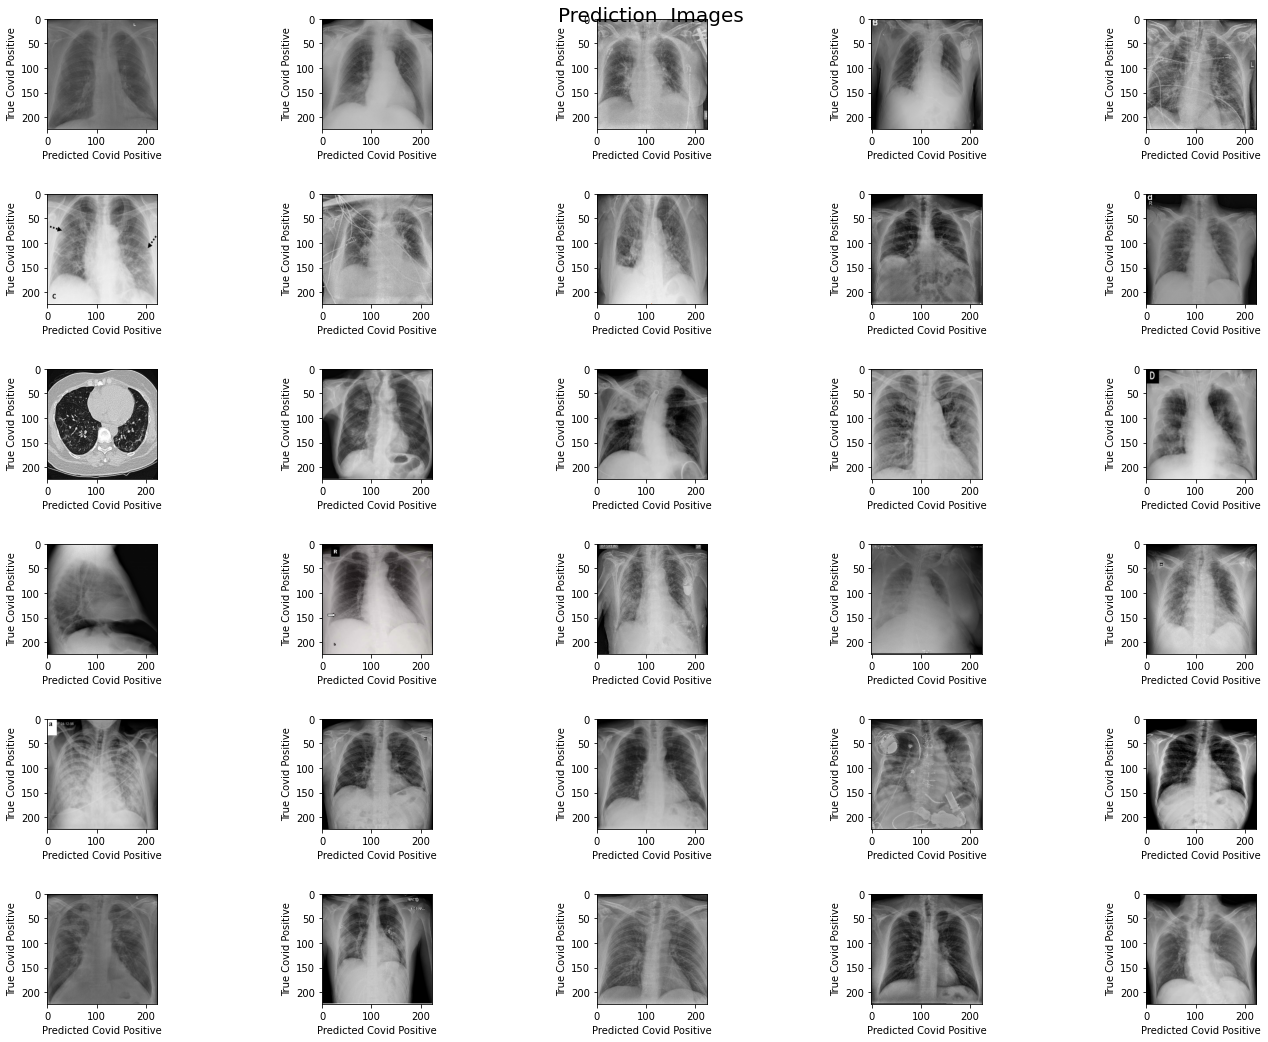

In [ ]:
plot_prediction(model_VGG19)

In [ ]:
model_VGG19.save('model_VGG192')

INFO:tensorflow:Assets written to: model_VGG192/assets


In [ ]:
model_VGG19.save_weights('model_VGG192_weights.h5')

In [ ]:
## overall performance

accuracy  = accuracy_score(pred_y, test_labels)
precision  = precision_score(pred_y, test_labels)
recall  = recall_score(pred_y, test_labels)
f1  = f1_score(pred_y, test_labels)


print()
print("Accuarcy Score----> ", accuracy)
print()
print("Precision Score---> ", precision)
print()
print("Recall Score------> ", recall)
print()
print("F1 Score----------> ", f1)
print()

print()


Accuarcy Score---->  0.5060975609756098

Precision Score--->  0.5182926829268293

Recall Score------>  0.5059523809523809

F1 Score---------->  0.5120481927710844




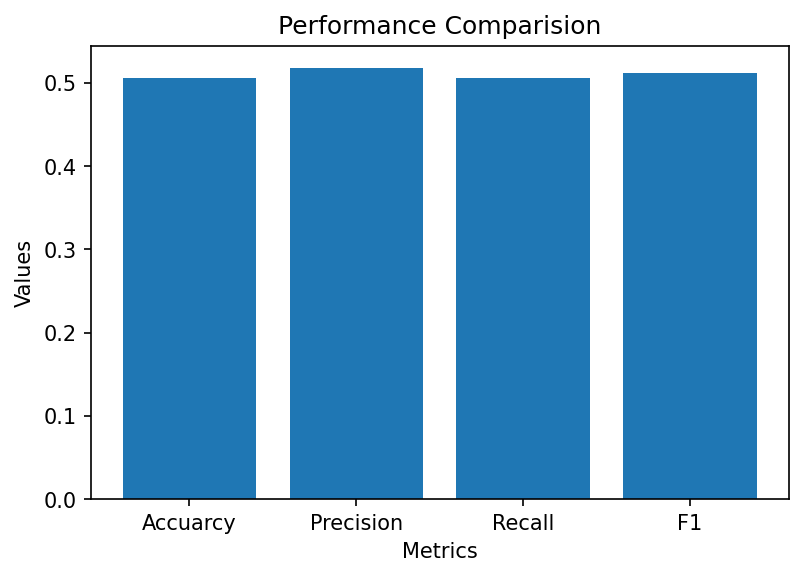

In [ ]:
## BAR plot

value = [accuracy, precision, recall, f1]
imena = ['Accuarcy', 'Precision', 'Recall', 'F1']

plt.figure(figsize = (6, 4), dpi=150)
plt.bar(imena, value)
plt.title('Performance Comparision')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

## ZAKLJUČAK

Kod RESNET50 modela smo mogli vidjeti da je točnost evaluacije na skupu za testiranje bila veća nakon što smo proveli fine-tuning. Narasla je sa 83.54% na 92.99% što je dovelo do toga da je i samo detektiranje covida-19 i upale pluća na slikama postalo dosta bolje. F1 score je 0.66, recall i točnost su 0.5, dok je preciznost 1.0. Kod VGG19 modela smo mogli vidjeti da je točnost evaluacije na skupu za testiranje bila veća nakon što smo proveli fine-tuning. Narasla je sa 94.82% na 97.56% što je dovelo do toga da je i samo detektiranje covida-19 i upale pluća na slikama postalo dosta bolje kao i kod RESNET50 modela. F1 score je 0.51, recall i točnost su 0.5, dok je preciznost 0.51.  S obzirom na dobivene postotke točnosti na skupu za testiranje rekli bi da nam je bolji ispao VGG19, no kada gledamo ostale mjere performansi vidimo da je ipak u nekim djelovima slabiji.



## ZAKLJUČAK NAKON PROMJENE:


S obzirom da prijašnji rezultati nisu pokazivali točnu sliku proveli smo još jednom analizu naše pripreme podataka i dobili određene promjene. U prvoj verziji, nakon što bi za oba modela odradili fine tuning, kada bi evaluirali model na test podacima dobili točnost za resnet50 92.99%, a za VGG19 97.56%. No, kasnije u računanju recall, precision i f1 score bi svi bili dosta manji, oko 50% što nije baš davalo rezultate da je model dobar. Kada smo ponovo procesirali podatke, te kod train_datagenerator.flow_from_directory odabrali da nam class_mode bude 'sparse' te još kod model.compile odabrali 'sparse_categorical_crossentropy' dobili smo puno bolje i realnije rezultate.

Naime, sada kod ResNet50 modela, koji je prije fine tuninga imao točnost na skupu za testiranje 60.67%, a nakon 92.99%, imamo puno bolje rezultate dobivene za recall, precision i f1 score. 

Za ResNet50 vrijednosti su sada:

Accuarcy Score---->  92.99%

Precision Score---> 95.12%

Recall Score------>  91.12%

F1 Score---------->  93.13%

Dalje, kod VGG19 modela, prije i poslije fine tuninga je 96.36%. Ali nama bitnije, da su vrijednosti recall, precision i f1 score-a puno bolje.
One su sada:

Accuarcy Score---->  96.36%

Precision Score---> 97%

Recall Score------>  96%

F1 Score---------->  96%

Sada u usporedbi ova dva modela možemo vidjeti da smo bolje rezultate dobili kod VGG19 modela.

NAPOMENA:Radi vremenskog ograničenja zadnjeg treniranja modela radili smo na manje epoha da stignemo predati na vrijeme, a da znamo da radi. Dok čekamo Vaš odgovor na seminar, još ćemo ga pregledavat i u slučaju nalaska ikoje greške ćemo Vam se javit.